In [4]:
import matplotlib.pyplot as pylot
import pandas as pd
import numpy as np
import pylab as pylab
%matplotlib inline

# %matplotlib inline komutu olmadan, grafik bir pencerede açılır ve Jupyter hücresi içinde görüntülenmez. Ancak, %matplotlib inline komutunu ekleyerek grafik, hücrenin içinde görüntülenir.

In [27]:
# !wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

!curl https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Skills

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
curl: (35) schannel: next InitializeSecurityContext failed: Unknown error (0x80092012) - �ptal i�levi sertifikan�n iptal edilip edilmedi�ini denetleyemedi.


In [28]:
df=pd.read_csv("data/FuelConsumption.csv")

In [29]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [13]:
cdf=df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS' ]]

In [30]:
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


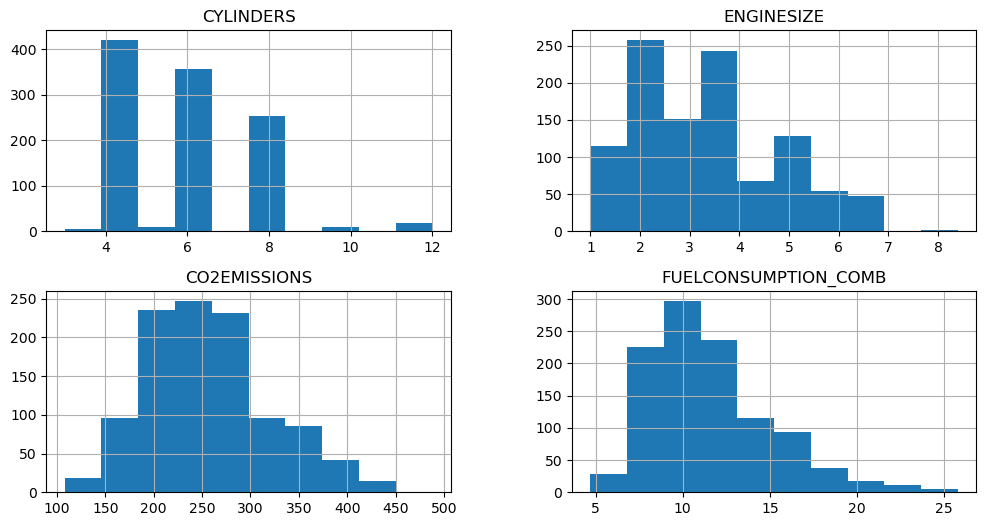

In [32]:
pylot.rcParams['figure.figsize'] = (12,6)

viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
pylot.show()

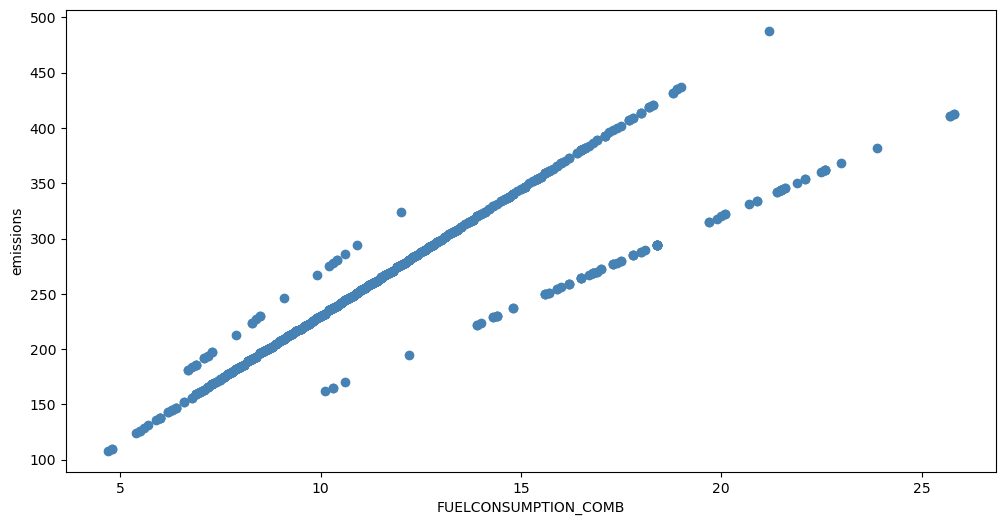

In [16]:
#  yakıt tüketimi ile CO2 emisyonları arasındaki ilişkiyi gösteren basit bir scatter plot çizimini

pylot.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color="steelblue")
pylot.xlabel("FUELCONSUMPTION_COMB")
pylot.ylabel("emissions")
pylot.show()

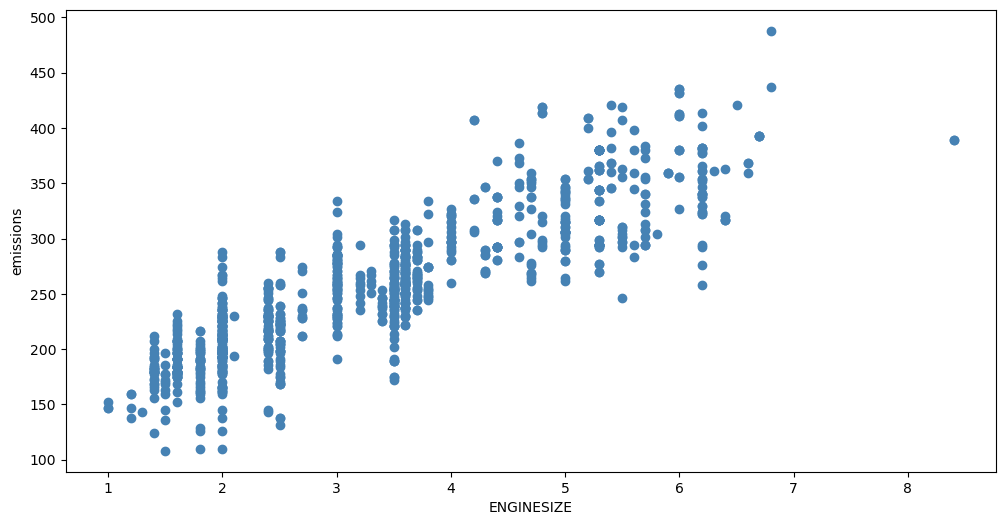

In [17]:
#araçların motor boyutu ile CO2 emisyonları arasındaki 
# ilişkiyi gösteren bir grafik oluşturur. 
# Genellikle, daha büyük motor boyutları genellikle daha yüksek CO2 emisyonları ile ilişkilidir, 
# bu nedenle bu tür bir grafik, motor boyutu ile 
# CO2 emisyonları arasındaki genel eğilimi görselleştirme
pylot.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="steelblue")
pylot.xlabel("ENGINESIZE")
pylot.ylabel("emissions")
pylot.show()

<Axes: xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

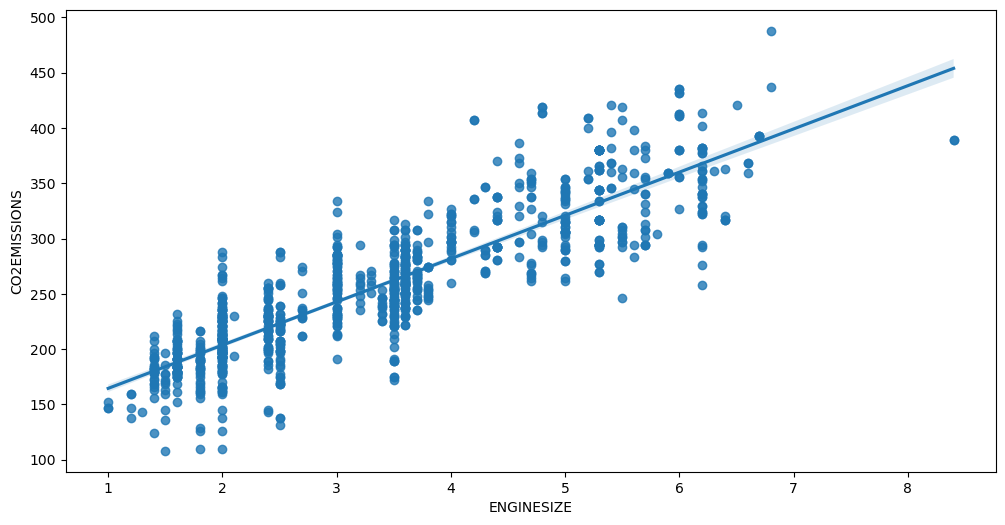

In [25]:
import seaborn as sns

sns.regplot(x=df['ENGINESIZE'], y=df['CO2EMISSIONS'])

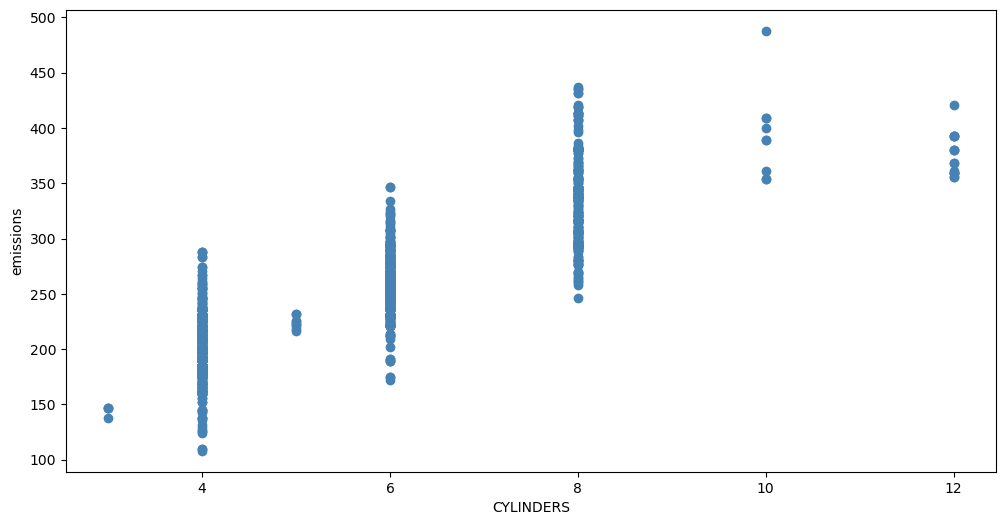

In [18]:
# Silindir sayısı arttıkça CO2 emisyonlarının nasıl değiştiğini görselleştirmek
pylot.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color="steelblue")
pylot.xlabel("CYLINDERS")
pylot.ylabel("emissions")
pylot.show()

In [33]:
# her bir rastgele sayının 0.8'den küçük olup olmadığını 
# kontrol eder. Sonuç, True veya False olan bir dizi olacaktır. Bu, rastgele seçilmiş gözlemlerin yüzde 80'ini True olarak ve geri kalan yüzde 20'sini False olarak işaretler.
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [34]:
msk

array([False,  True,  True, ...,  True,  True,  True])

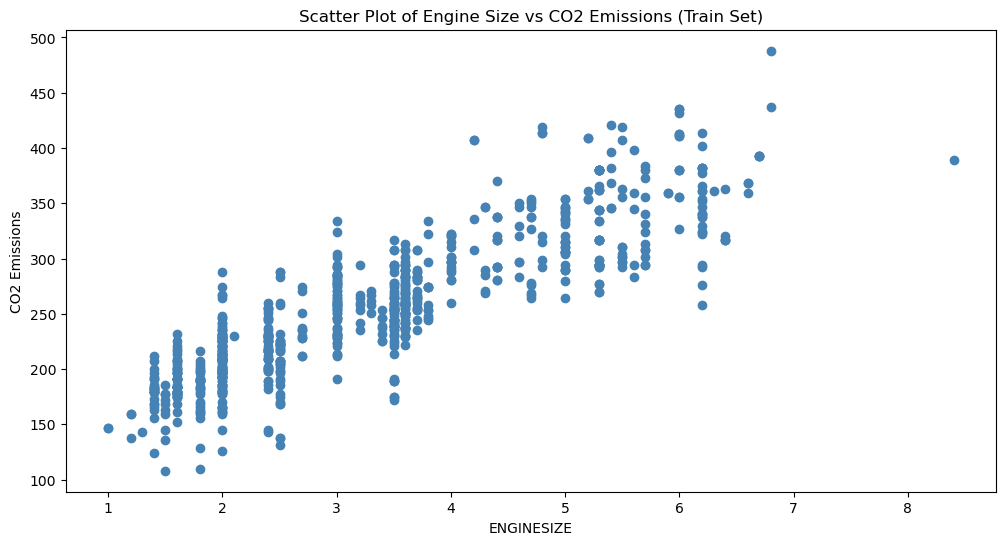

In [35]:
# Eğer train bir DataFrame ise ve 'ENGINESIZE' ve 'CO2EMISSIONS' sütunlarına sahipse:
pylot.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="steelblue")
pylot.xlabel("ENGINESIZE")
pylot.ylabel("CO2 Emissions")
pylot.title("Scatter Plot of Engine Size vs CO2 Emissions (Train Set)")
pylot.show()

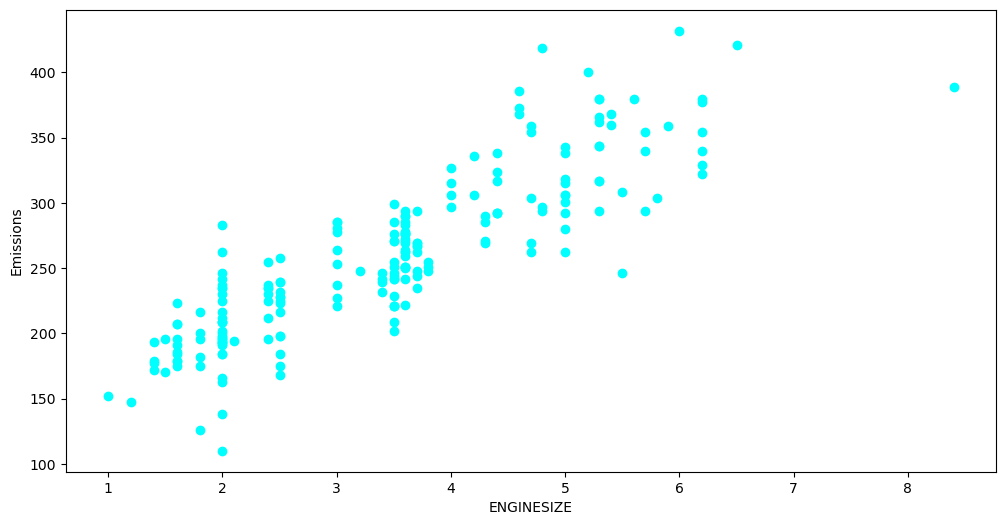

In [48]:
pylot.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color="cyan")
pylot.xlabel("ENGINESIZE")
pylot.ylabel("Emissions")
pylot.show()

In [49]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit(train_x, train_y)

LinearRegression()

In [50]:
# eğitilmiş lineer regresyon modelinin katsayılarını ve kesme noktasını ekrana yazdırıldı. 
# Bu değerler, özellikler (bağımsız değişkenler) ile bağımlı değişken arasındaki ilişkiyi temsil eder. 
# Örneğin, bir motorun boyutu ile CO2 emisyonları arasındaki 
# ilişkiyi modelleyen bir regresyon modelinde, regr.coef_ değerleri motor boyutunun CO2 emisyonlarına olan etkisini gösterir 
# ve regr.intercept_ değeri regresyon doğrusunun yatay ekseni kestiği noktayı temsil eder.
print(regr.coef_)
print(regr.intercept_)

[[39.14845541]]
[125.33519522]


- Mean Absolute Error (MAE), Mean Squared Error (MSE) ve Root Mean Squared Error (RMSE) regresyon modellerinin performansını değerlendirmek için kullanılan üç yaygın metriktir.

MAE:
- MAE, modelin tahminlerinin gerçek değerlerden ne kadar sapma gösterdiğini ölçen bir metriktir.
- Her bir gözlem için gerçek değer ile tahmin arasındaki mutlak farkların ortalaması alınır.
- Daha küçük bir MAE, modelin daha iyi performans gösterdiğini gösterir.
MSE:
- MSE, gerçek değerler ile tahminler arasındaki farkların karesinin ortalamasını alır.
- Hata kareleri kullanıldığı için büyük sapmalar daha fazla ağırlık taşır ve bu nedenle daha büyük hatalar daha belirgin hale gelir.
RMSE:
- RMSE, MSE'nin karekökü alınarak elde edilir. Bu, hataların orijinal ölçü biriminde ifade edilmesini sağlar.
- Daha küçük bir RMSE, modelin daha iyi performans gösterdiğini gösterir.

Bu metrikler, regresyon modellerinin performansını ölçmek için kullanılır. RMSE, hataların orijinal ölçü biriminde ifade edilmesi açısından MSE'ye tercih edilebilir. Her üç metrik de modelin performansını değerlendirmek için kullanılabilir, ancak veri setine ve probleme bağlı olarak tercih edilebilecek farklı ölçütlerdir.


In [39]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

In [40]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 23.39
Residual sum of squares (MSE): 933.98
R2-score: 0.76


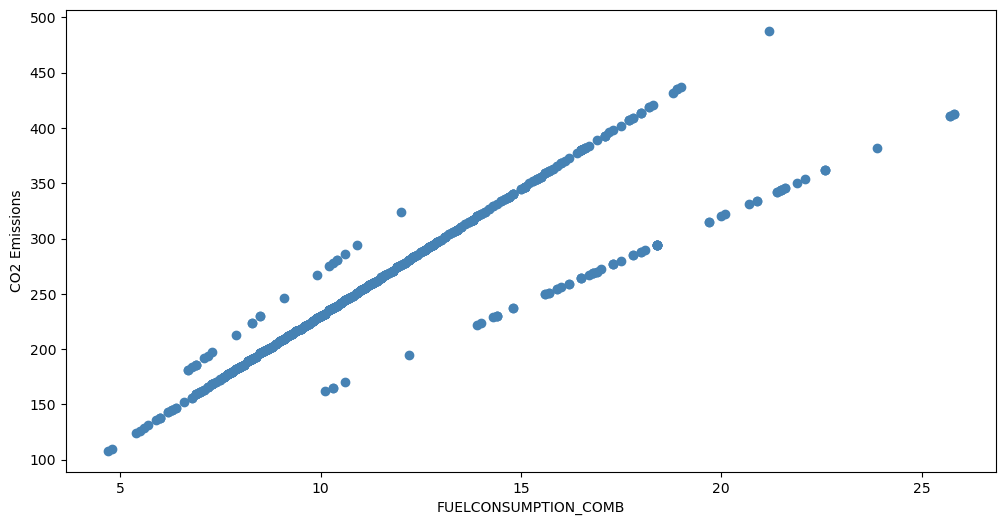

In [41]:
# Eğer train bir DataFrame ise ve 'ENGINESIZE' ve 'CO2EMISSIONS' sütunlarına sahipse:
pylot.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS, color="cyan")
pylot.xlabel("FUELCONSUMPTION_COMB")
pylot.ylabel("Emissions")
pylot.show()

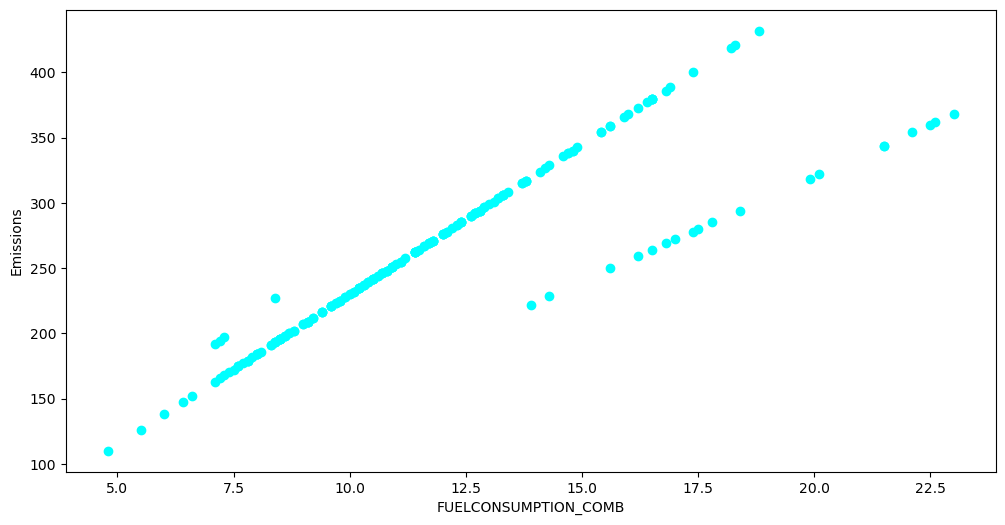

In [43]:
pylot.scatter(test.FUELCONSUMPTION_COMB, test.CO2EMISSIONS, color="cyan")
pylot.xlabel("FUELCONSUMPTION_COMB")
pylot.ylabel("Emissions")
pylot.show()

In [44]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit(train_x, train_y)

LinearRegression()

In [45]:
print(regr.coef_)
print(regr.intercept_)

[[16.34807861]]
[66.85449746]


In [46]:
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

In [47]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 20.22
Residual sum of squares (MSE): 826.22
R2-score: 0.78
